In [1]:
url = "https://raw.githubusercontent.com/tsunafield1/Car_price_prediction/main/Source/car%20data.csv"    # last updated 2020

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Additional library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
import math

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(url)                                                                                                                  # load data from file
data.head()                

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [7]:
data.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data["Car_Name"].value_counts()

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
camry                 1
Bajaj Avenger 150     1
s cross               1
Suzuki Access 125     1
Honda CB Unicorn      1
Name: Car_Name, Length: 98, dtype: int64

In [9]:
print("Unique Car_Name values : ",len(data["Car_Name"].unique()))

Unique Car_Name values :  98


In [10]:
data["Year"].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

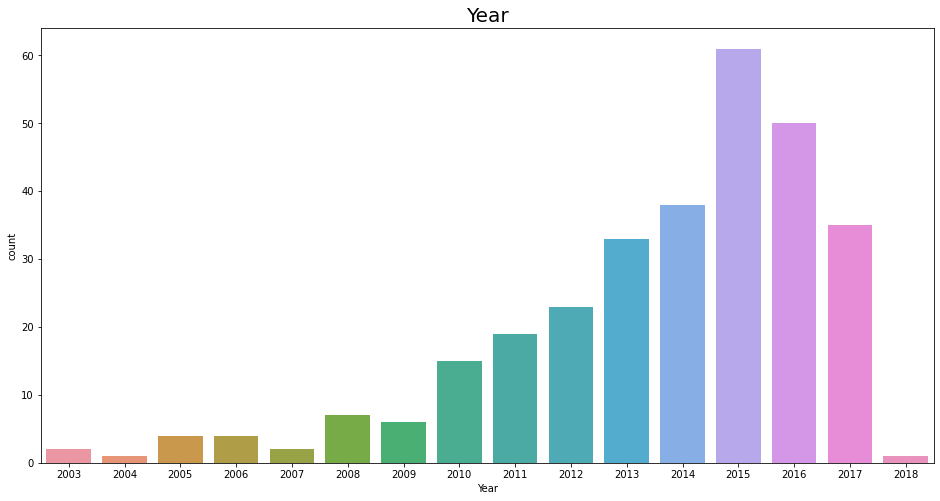

In [11]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('Year',fontsize = 20)                                                                                                                   
sns.countplot(x = 'Year', data = data)                                                                                                                                      
plt.show()

In [12]:
data["Selling_Price"].value_counts()

0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64

In [13]:
data["Selling_Price"].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

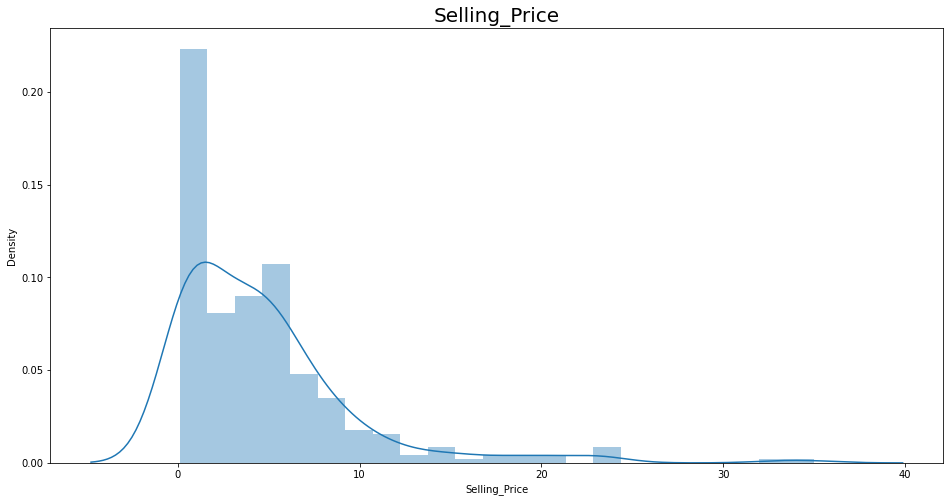

In [14]:
plt.figure(figsize = (16, 8))                                                                                                           # set size of graph to 10x8
plt.title('Selling_Price',fontsize = 20)                                                                                              # set title of graph                          
sns.distplot(data['Selling_Price'])                                                                                                      # plot graph                                
plt.show()

In [15]:
data["Present_Price"].value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
9.29      1
92.60     1
13.70     1
1.17      1
0.65      1
Name: Present_Price, Length: 147, dtype: int64

In [16]:
data["Present_Price"].describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

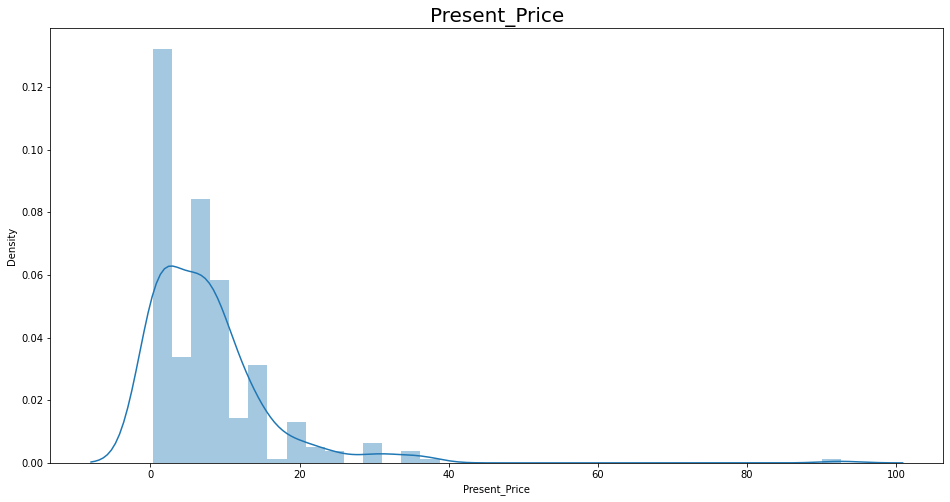

In [17]:
plt.figure(figsize = (16, 8))                                                                                                           # set size of graph to 10x8
plt.title('Present_Price',fontsize = 20)                                                                                              # set title of graph                          
sns.distplot(data['Present_Price'])                                                                                                      # plot graph                                
plt.show()

In [18]:
data["Kms_Driven"].value_counts()	

15000     9
45000     9
35000     5
25000     5
50000     5
         ..
1000      1
500000    1
11800     1
5400      1
4100      1
Name: Kms_Driven, Length: 206, dtype: int64

In [19]:
data["Kms_Driven"].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

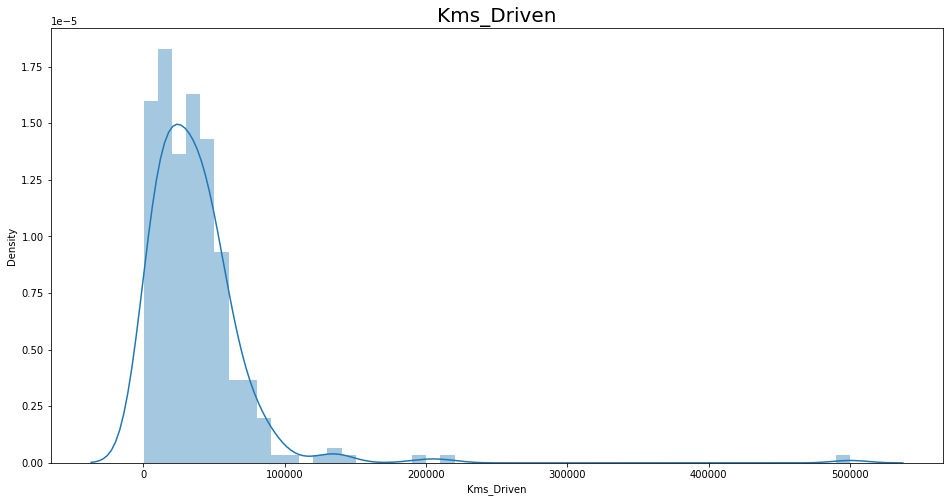

In [20]:
plt.figure(figsize = (16, 8))                                                                                                           # set size of graph to 10x8
plt.title('Kms_Driven',fontsize = 20)                                                                                              # set title of graph                          
sns.distplot(data['Kms_Driven'])                                                                                                      # plot graph                                
plt.show()

In [21]:
data["Fuel_Type"].value_counts()	

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

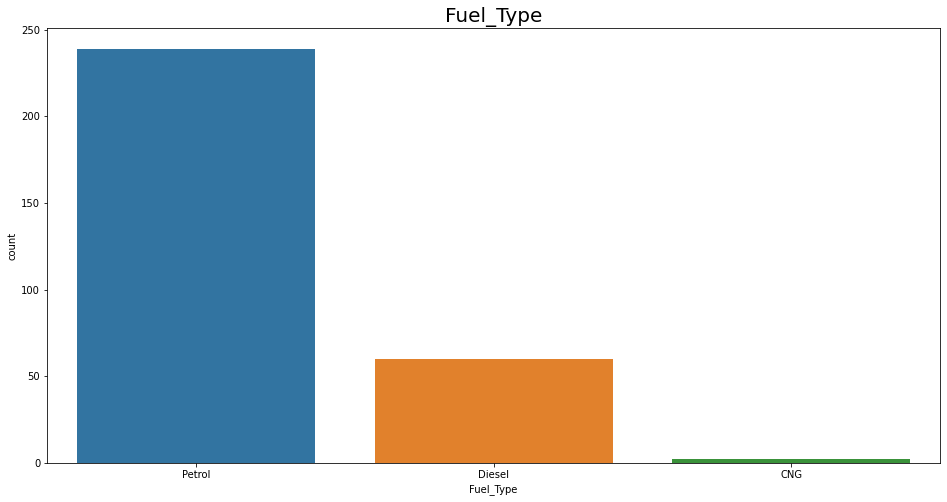

In [22]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('Fuel_Type',fontsize = 20)                                                                                                                   
sns.countplot(x = 'Fuel_Type', data = data)                                                                                                                                      
plt.show()

In [23]:
data["Seller_Type"].value_counts()	

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

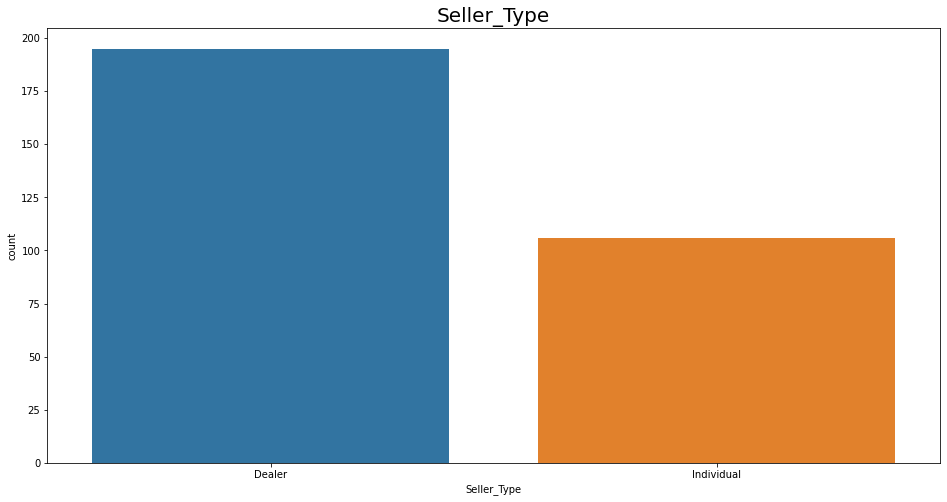

In [24]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('Seller_Type',fontsize = 20)                                                                                                                   
sns.countplot(x = 'Seller_Type', data = data)                                                                                                                                      
plt.show()

In [25]:
data["Transmission"].value_counts()	

Manual       261
Automatic     40
Name: Transmission, dtype: int64

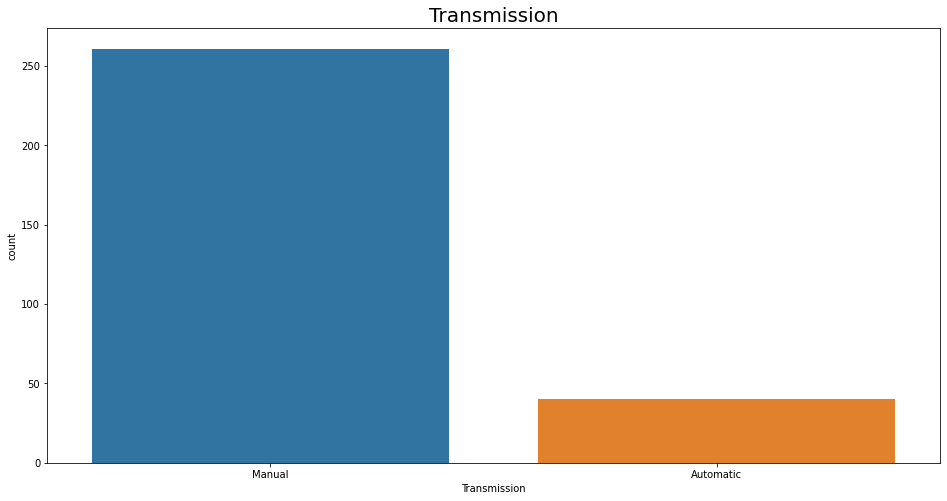

In [26]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('Transmission',fontsize = 20)                                                                                                                   
sns.countplot(x = 'Transmission', data = data)                                                                                                                                      
plt.show()

In [27]:
data["Owner"].value_counts()	

0    290
1     10
3      1
Name: Owner, dtype: int64

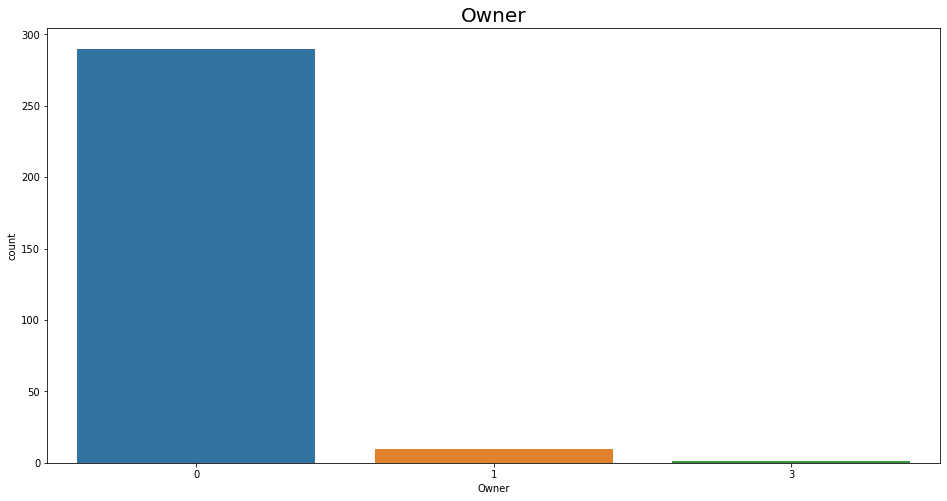

In [28]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('Owner',fontsize = 20)                                                                                                                   
sns.countplot(x = 'Owner', data = data)                                                                                                                                      
plt.show()

In [29]:
data.drop('Car_Name', axis=1, inplace=True)                                                                                           # drop name because there are too many unique value
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
data['Year'].replace({2010 : 1, 2011 : 2, 2012 : 3, 2013 : 4, 2014 : 5, 2015 : 6, 2016 : 7, 2017 : 8, 2018 : 9}, inplace=True)
data.loc[(data['Year'] >= 2003) & (data['Year']<= 2009), 'Year'] = 0
data['Year'].value_counts()

6    61
7    50
5    38
8    35
4    33
0    26
3    23
2    19
1    15
9     1
Name: Year, dtype: int64

In [31]:
data["Kms_Driven"].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

In [32]:
data.loc[(data['Kms_Driven'] >= 500) & (data['Kms_Driven'] <= 15000), 'Kms_Driven'] = 0
data.loc[(data['Kms_Driven'] > 15000) & (data['Kms_Driven'] <= 32000), 'Kms_Driven'] = 1
data.loc[(data['Kms_Driven'] > 32000) & (data['Kms_Driven'] <= 49000), 'Kms_Driven'] = 2
data.loc[(data['Kms_Driven'] > 49000), 'Kms_Driven'] = 3
data["Kms_Driven"].value_counts()

0    77
2    76
1    75
3    73
Name: Kms_Driven, dtype: int64

In [33]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [34]:
numFuel = {"Petrol":0,"Diesel":1,"CNG":2}
data["Fuel_Type"].replace(numFuel, inplace = True) 
data["Fuel_Type"].value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [35]:
data["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [36]:
numSeller = {"Individual":0,"Dealer":1}
data["Seller_Type"].replace(numSeller, inplace = True) 
data["Seller_Type"].value_counts()

1    195
0    106
Name: Seller_Type, dtype: int64

In [37]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [38]:
numTrans = {"Manual":0,"Automatic":1}
data["Transmission"].replace(numTrans, inplace = True) 
data["Transmission"].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [39]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,1,0,1,0,0
1,4,4.75,9.54,2,1,1,0,0
2,8,7.25,9.85,0,0,1,0,0
3,2,2.85,4.15,0,0,1,0,0
4,5,4.60,6.87,2,1,1,0,0


In [40]:
np.matrix(data)

matrix([[ 5.  ,  3.35,  5.59, ...,  1.  ,  0.  ,  0.  ],
        [ 4.  ,  4.75,  9.54, ...,  1.  ,  0.  ,  0.  ],
        [ 8.  ,  7.25,  9.85, ...,  1.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  3.35, 11.  , ...,  1.  ,  0.  ,  0.  ],
        [ 8.  , 11.5 , 12.5 , ...,  1.  ,  0.  ,  0.  ],
        [ 7.  ,  5.3 ,  5.9 , ...,  1.  ,  0.  ,  0.  ]])

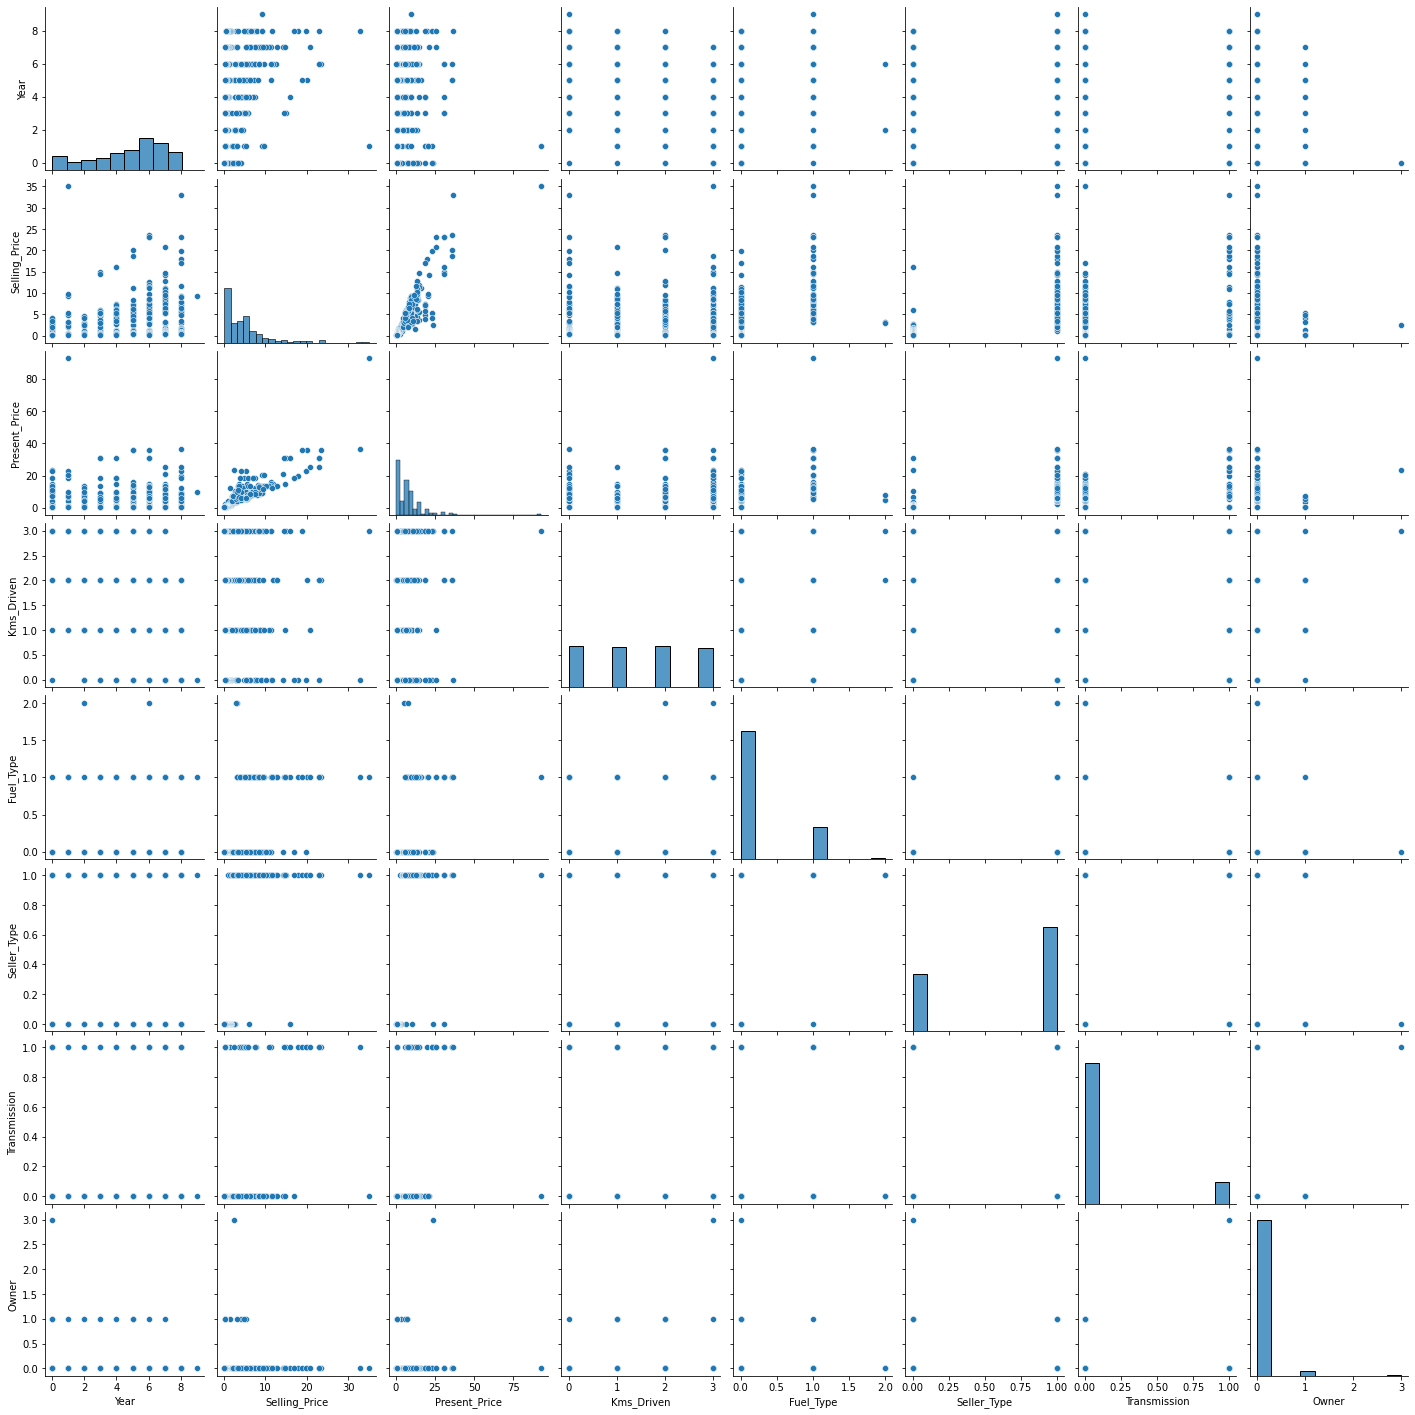

In [41]:
sns.pairplot(data)

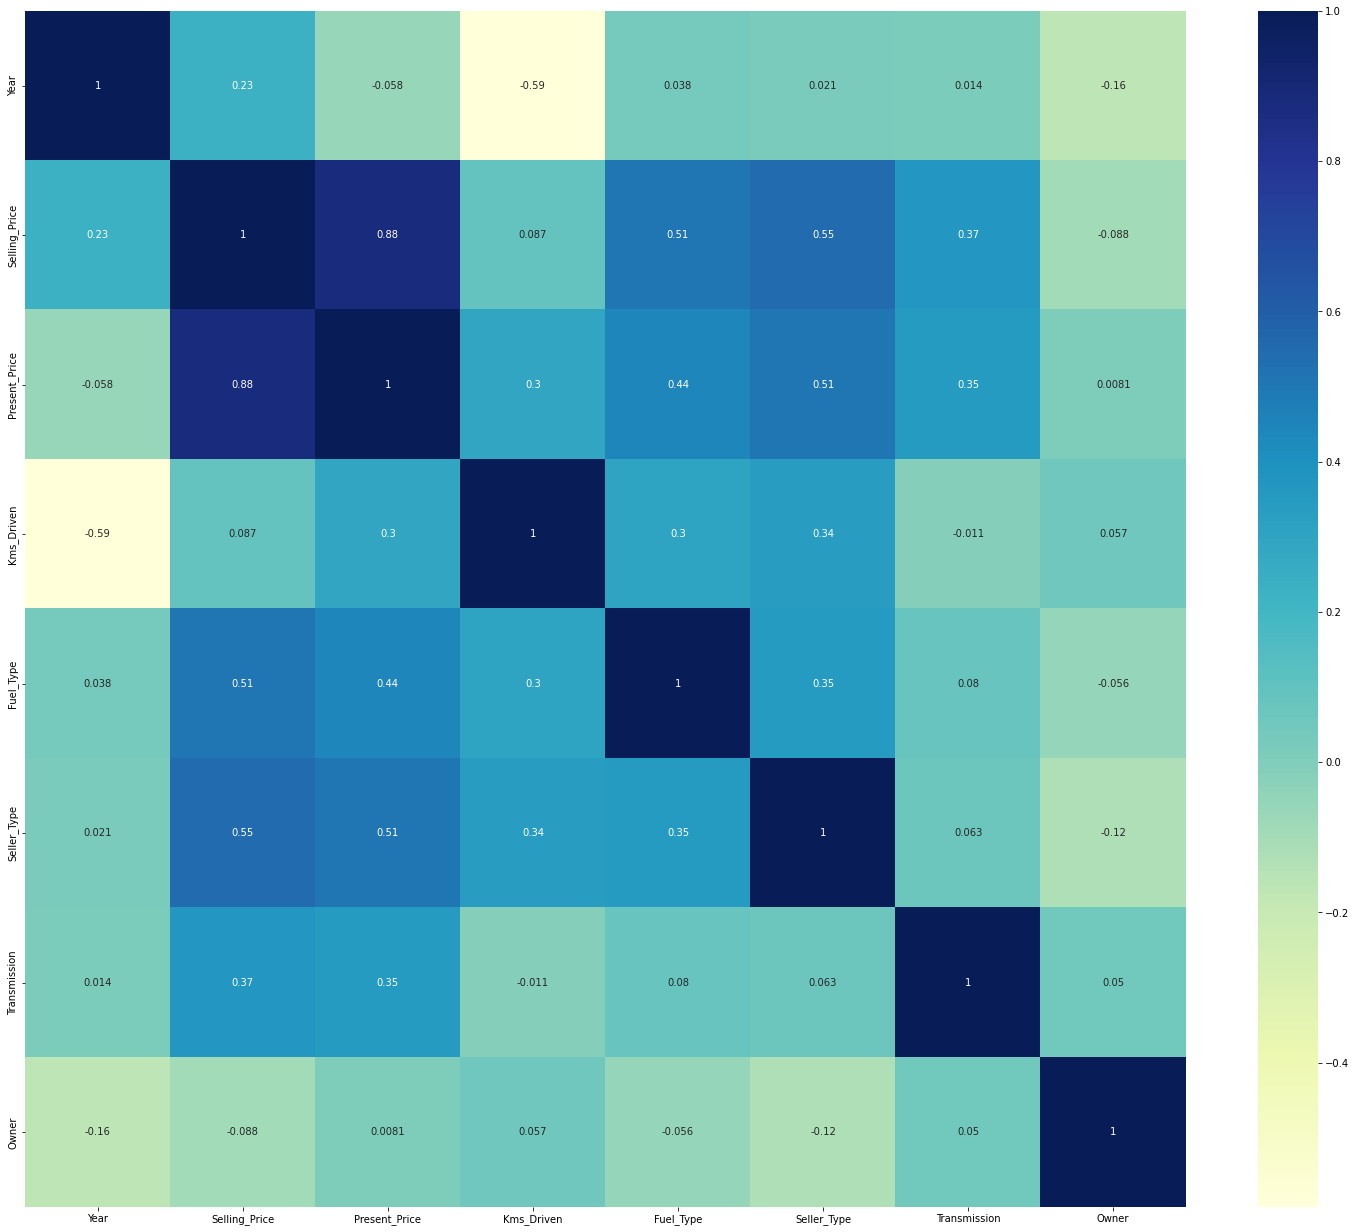

In [42]:
correlations = data.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(data[indx].corr(),annot=True,cmap="YlGnBu")

In [43]:
#Training (Selling_Price)
x1 = data.drop(['Selling_Price'], axis=1)         #Drop both Price makes Linear Regression score lower
y1 = data['Selling_Price']

x1 = RobustScaler().fit_transform(x1)

x1Train, x1Test, y1Train, y1Test = train_test_split(x1, y1, test_size = 0.2,random_state = 42)
x1Train.shape, x1Test.shape, y1Train.shape, y1Test.shape

((240, 7), (61, 7), (240,), (61,))

In [44]:
#Linear Regression (Selling_Price)
aLR = LinearRegression()
aLR.fit(x1Train, y1Train)
yPredict = aLR.predict(x1Test)
print("Linear regression score : ",aLR.score(x1Test, y1Test))
print("Mean squared error : ", mean_squared_error(y1Test, yPredict))

Linear regression score :  0.8592697783382605
Mean squared error :  3.2418029156481825


In [45]:
#Linear Regression (Selling_Price)
yPredict = aLR.predict(x1)
print("Linear regression score : ",aLR.score(x1, y1))
print("Mean squared error : ", mean_squared_error(y1, yPredict))

Linear regression score :  0.8852375928700549
Mean squared error :  2.955033613791859


In [46]:
yPredict = aLR.predict(x1)
np.set_printoptions(precision=2,suppress=True)
print("Predict Y(Selling_Price)\n",yPredict)

#for i in range(0,len(yPredict)-3,3):
#  a_format = '{0:.3g}'.format(yPredict[i])
#  b_format = '{0:.3g}'.format(yPredict[i+1])
#  c_format = '{0:.3g}'.format(yPredict[i+2])
#  print(a_format+"   "+b_format+"   "+c_format)

Predict Y(Selling_Price)
 [ 4.08  6.55  7.53  2.57  5.77  9.4   5.61  6.95  7.83  7.08  4.77  7.38
  8.22  5.42  2.06  8.32  7.91  8.32  6.86  3.16  4.17  5.7   4.69  2.79
  2.45  2.59  3.1   4.31  1.38  7.73  4.21  1.85  6.04  7.13  6.3   6.06
  4.85 -1.5   4.43  2.41  7.36  3.02  2.04  6.3   1.28  8.74  2.66  0.71
  5.42  8.05 16.58 18.15 14.86 15.6   2.01  6.99  4.88  7.49  3.28 20.11
  9.09  5.07 19.76 20.52 22.15  5.8  14.88  9.81  5.77 12.02  5.37  7.03
  8.74  2.56  6.33  4.67  7.    5.8  10.85 16.58 10.48  6.61 17.35  9.09
  6.31  6.52 41.76  6.18  3.53  4.25  7.11  9.5   4.94 18.15 10.42  8.33
 16.59 11.43  9.09  9.81  2.22  2.59  2.58  2.5   2.44  1.67  0.77  0.83
  1.7   2.44  2.17  2.05  1.63  1.3   1.28  1.28  0.11  1.82  1.28  1.
  1.94  0.01  1.9   0.11  0.53 -1.39  2.21  1.74  2.17  2.16  2.17  0.99
  2.21  1.8   2.15  1.3   0.75  0.16  1.77  1.05  0.34  1.39  1.    1.4
  0.66 -0.24  0.92  0.3  -1.34  1.45 -0.29  1.28  0.19 -0.1   0.96  3.47
  2.02  1.    2.03  3.47 -0.

In [47]:
buf = data['Selling_Price']
print("Real Y(Selling_Price)")
print("[",end="")
for i in range(len(buf+1)):
  print(buf[i],end="  ")
  if i>0 and i%12 == 0:
    print("")
print("]")

Real Y(Selling_Price)
[3.35  4.75  7.25  2.85  4.6  9.25  6.75  6.5  8.75  7.45  2.85  6.85  7.5  
6.1  2.25  7.75  7.25  7.75  3.25  2.65  2.85  4.9  4.4  2.5  2.9  
3.0  4.15  6.0  1.95  7.45  3.1  2.35  4.95  6.0  5.5  2.95  4.65  
0.35  3.0  2.25  5.85  2.55  1.95  5.5  1.25  7.5  2.65  1.05  5.8  
7.75  14.9  23.0  18.0  16.0  2.75  3.6  4.5  4.75  4.1  19.99  6.95  
4.5  18.75  23.5  33.0  4.75  19.75  9.25  4.35  14.25  3.95  4.5  7.45  
2.65  4.9  3.95  5.5  1.5  5.25  14.5  14.73  4.75  23.0  12.5  3.49  
2.5  35.0  5.9  3.45  4.75  3.8  11.25  3.51  23.0  4.0  5.85  20.75  
17.0  7.05  9.65  1.75  1.7  1.65  1.45  1.35  1.35  1.35  1.25  1.2  
1.2  1.2  1.15  1.15  1.15  1.15  1.11  1.1  1.1  1.1  1.05  1.05  
1.05  1.05  1.0  0.95  0.9  0.9  0.75  0.8  0.78  0.75  0.75  0.75  
0.72  0.65  0.65  0.65  0.65  0.6  0.6  0.6  0.6  0.6  0.6  0.6  
0.6  0.55  0.55  0.52  0.51  0.5  0.5  0.5  0.5  0.5  0.48  0.48  
0.48  0.48  0.45  0.45  0.45  0.45  0.45  0.45  0.45  0.45  0.42  0.

In [48]:
#Graph Option1
'''f, ax = plt.subplots(2, 1, figsize=(12, 10) )

sns.scatterplot(x=yPredict,y='Present_Price',data=data, ax = ax[0])
ax[0].set_title("Predict_Selling_Price vs Present_Price", fontsize=15)

sns.scatterplot(x='Selling_Price',y='Present_Price',data=data, ax = ax[1])
ax[1].set_title("Real_Selling_Price vs Present_Price", fontsize=15)

plt.show()'''

'f, ax = plt.subplots(2, 1, figsize=(12, 10) )\n\nsns.scatterplot(x=yPredict,y=\'Present_Price\',data=data, ax = ax[0])\nax[0].set_title("Predict_Selling_Price vs Present_Price", fontsize=15)\n\nsns.scatterplot(x=\'Selling_Price\',y=\'Present_Price\',data=data, ax = ax[1])\nax[1].set_title("Real_Selling_Price vs Present_Price", fontsize=15)\n\nplt.show()'

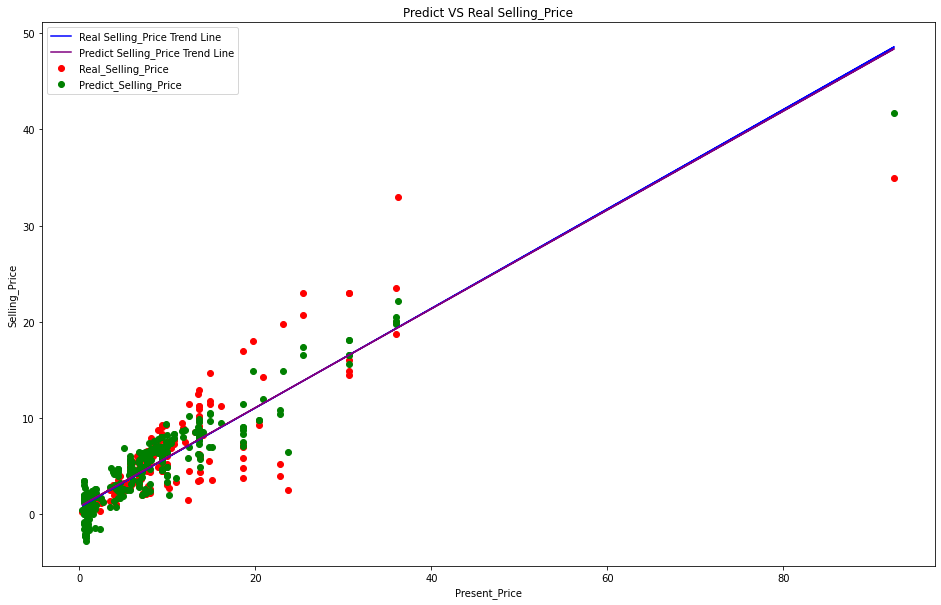

In [49]:
#Graph Option2
plt.figure(figsize=(16,10))

rSellX = pSellX =data['Present_Price']
rSellY = data['Selling_Price']
pSellY = yPredict

plt.scatter(rSellX,rSellY,color='red',label="Real_Selling_Price")
plt.scatter(pSellX,pSellY,color='green',label="Predict_Selling_Price")

pfRealPres = np.polyfit(rSellX,rSellY,1)
pfPredPres = np.polyfit(pSellX,pSellY,1)

realPresTL = np.poly1d(pfRealPres)
predPresTL = np.poly1d(pfPredPres)

plt.plot(rSellX,realPresTL(rSellX),c='blue',label='Real Selling_Price Trend Line')
plt.plot(pSellX,predPresTL(pSellX),c='purple',label='Predict Selling_Price Trend Line')

plt.title('Predict VS Real Selling_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.legend()
plt.show()

In [50]:
#Cosine Similarity
real = data['Selling_Price'].values.tolist()                          #List of real values
predict = yPredict.tolist()                                           #List of predict values
dot = np.dot(real,predict)                                            #Dot product
magReal = np.linalg.norm(real)                                        #magnitude of real values
magPredict = np.linalg.norm(predict)                                  #magnitude of predict values
cosine = dot/(magReal*magPredict)                                     #cosine value
degree = float("{0:.3f}".format((math.acos(cosine)*180)/math.pi))     #value in degree

print("Cosine =","{0:.4f}".format(cosine))
print("Degree =",degree,"°")

Cosine = 0.9684
Degree = 14.447 °


In [54]:
#Predict Output from Input
#Use : Y = aLR.predict(X)
print("  *** Car Selling Price Prediction ***\nInput :")
cYear = int(input("Year : "))
cPP = int(input("Present Price (THB) : "))
cKM = int(input("Kms Driven (km) : "))
cFuel = int(input("Fuel type (Select one: Petrol = 0 / Diesel = 1 / CNG = 2): "))
cSeller = int(input("Seller Type (Select one: Individual = 0 / Dealer = 1): "))
cTrans = int(input("Car Transmission (Select one: Manual = 0 / Automatic = 1): "))
cOwner = int(input("Number of Car Owner (Select one: First hand = 0 / Second hand = 1 / Third hand = 2 / Fourth hand or more = 3): "))

#Convert input
if cYear < 2009 : cYear = 0
elif cYear == 2010 : cYear = 1
elif cYear == 2011 : cYear = 2
elif cYear == 2012 : cYear = 3
elif cYear == 2013 : cYear = 4
elif cYear == 2014 : cYear = 5
elif cYear == 2015 : cYear = 6
elif cYear == 2016 : cYear = 7
elif cYear == 2017 : cYear = 8
elif cYear == 2018 : cYear = 9
elif cYear >= 2019 : cYear = cYear - 2009
  
if cKM >= 0 and cKM <= 15000 : cKM = 0
elif cKM > 15000 and cKM <= 32000 : cKM = 1
elif cKM > 32000 and cKM <= 49000 : cKM = 2
elif cKM > 49000 : cKM = 3

cPP = (cPP/0.44)/pow(10,5)
cPP = "{0:.2f}".format(cPP)
#Check var
#print(cYear)
#print(cPP)
#print(cKM)

#Calculte
inpData = {'Year':[cYear],'Present_Price':[cPP],'Kms_Driven':[cKM],'Fuel_Type':[cFuel],'Seller_Type':[cSeller],'Transmission':[cTrans],'Owner':[cOwner]}
newDF = pd.DataFrame(inpData)
newX = data.drop('Selling_Price',axis=1)
newX = newX.append(newDF,ignore_index=True)
inpX = RobustScaler().fit_transform(newX)
outputPredict = aLR.predict(inpX)
opPred = outputPredict[len(outputPredict)-1]
opPred = str(opPred*pow(10,5)*0.44)
opPred = "{0:.2f}".format(float(opPred))
#ans = opPred

#Output
print("Output :\nPredict selling price : "+opPred+" THB")

  *** Car Selling Price Prediction ***
Input :
Year : 2025
Present Price (THB) : 1250000
Kms Driven (km) : 30000
Fuel type (Select one: Petrol = 0 / Diesel = 1 / CNG = 2): 1
Seller Type (Select one: Individual = 0 / Dealer = 1): 0
Car Transmission (Select one: Manual = 0 / Automatic = 1): 0
Number of Car Owner (Select one: First hand = 0 / Second hand = 1 / Third hand = 2 / Fourth hand or more = 3): 1
Output :
Predict selling price : 781509.92 THB
